# **Netflix Content Trends Dashboard Analysis**

## **1. Background**

Netflix is one of the most popular video streaming platforms in the world. With thousands of movies and TV shows available to users, it's important to analyze trends in the types of content being added over the years. This analysis provides insight into the growth of content, genre popularity, country origins, and overall trends to support better content planning and user engagement strategies.

## **2. Problem Statement**

* What is the distribution between Movies and TV Shows?

* Which genres are the most common on Netflix?

* hat countries produce the most Netflix content?

* How has the volume of content added to Netflix evolved over time?

## **3. Dataset Description**


* **Source:** [Netflix Titles on Kaggle](https://www.kaggle.com/datasets/shivamb/netflix-shows)
* **Size:** \~8800 rows
* **Main Columns:**

  * `type`: Movie or TV Show
  * `title`: Title of the show
  * `director`, `cast`: People involved
  * `country`: Origin country
  * `date_added`: Date added to Netflix
  * `release_year`: Year released
  * `rating`: Audience rating
  * `duration`: Length or number of seasons
  * `listed_in`: Genres
  * `description`: Summary


## **4. Data Loading & Cleaning**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter



# load data
df = pd.read_csv('netflix_titles.csv')

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [50]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df['director'] = df['director'].fillna('Unknown')

df['cast'] = df['cast'].fillna('Unknown')

df['country'] = df['country'].fillna('Unknown')


In [ ]:
# Handle missing values: Fill date_added with 1 Jan of release year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['date_added'] = df['date_added'].fillna(pd.to_datetime(df['release_year'].astype(str) + '-01-01'))

# Extract year_added
df['year_added'] = df['date_added'].dt.year

# Explode genre
genre_exploded = df[['show_id', 'listed_in']].dropna()
genre_exploded = genre_exploded.assign(genre=genre_exploded['listed_in'].str.split(', '))
genre_exploded = genre_exploded.explode('genre')
genre_exploded['genre'] = genre_exploded['genre'].str.strip()

# Top 10 genres
top_10_genre = genre_exploded['genre'].value_counts().nlargest(10).reset_index()
top_10_genre.columns = ['genre', 'count']
top_10_genre_path = 'top_10_genre.csv'
top_10_genre.to_csv(top_10_genre_path, index=False)

# Explode country
country_exploded = df[['show_id', 'country']].dropna()
country_exploded = country_exploded.assign(country=country_exploded['country'].str.split(', '))
country_exploded = country_exploded.explode('country')
country_exploded['country'] = country_exploded['country'].str.strip()

# Top 10 countries
top_10_country = country_exploded['country'].value_counts().nlargest(10).reset_index()
top_10_country.columns = ['country', 'count']
top_10_country_path = 'top_10_country.csv'
top_10_country.to_csv(top_10_country_path, index=False)

# Save cleaned dataset
cleaned_data_path = 'netflix_data_clean.csv'
df.to_csv(cleaned_data_path, index=False)

cleaned_data_path, top_10_genre_path, top_10_country_path


('netflix_data_clean.csv', 'top_10_genre.csv', 'top_10_country.csv')

## **5. Exploratory Data Analysis (EDA)**

### **a. Distribution of Movie vs TV Show**

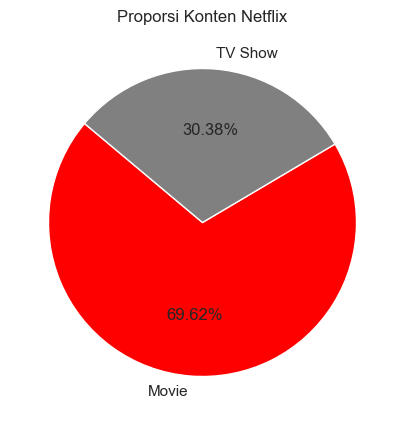

In [55]:
data_pie = df['type'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(data_pie, labels=data_pie.index, autopct='%.2f%%', colors=['red', 'gray'], startangle=140)
plt.title('Proporsi Konten Netflix')
plt.show()


### **b. Top 10 Countries**

C:\Users\USER\AppData\Local\Temp\ipykernel_25296\4065905441.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




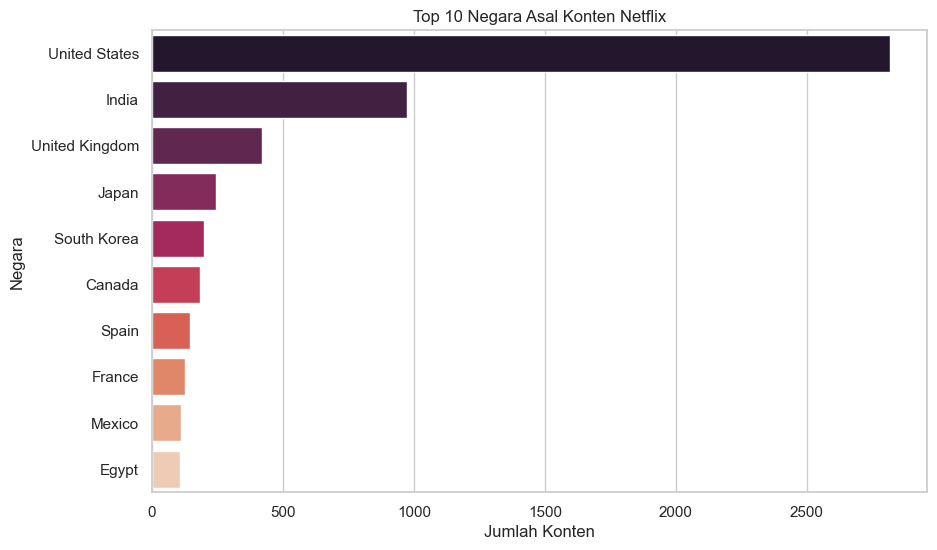

In [56]:
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='rocket')
plt.title('Top 10 Negara Asal Konten Netflix')
plt.xlabel('Jumlah Konten')
plt.ylabel('Negara')
plt.show()


### **c. Top 10 Genres**

C:\Users\USER\AppData\Local\Temp\ipykernel_25296\2616729179.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




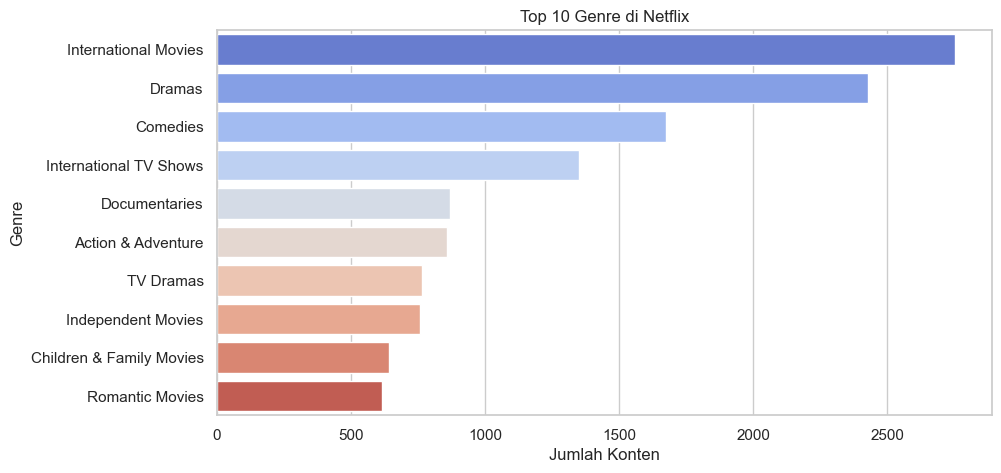

In [57]:
# Pecah genre (karena 1 data bisa punya beberapa genre)
from collections import Counter

genre_split = df['listed_in'].str.split(', ')
genre_list = genre_split.explode()
genre_top = genre_list.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_top.values, y=genre_top.index, palette='coolwarm')
plt.title('Top 10 Genre di Netflix')
plt.xlabel('Jumlah Konten')
plt.ylabel('Genre')
plt.show()


### **d. Content Added per Year**

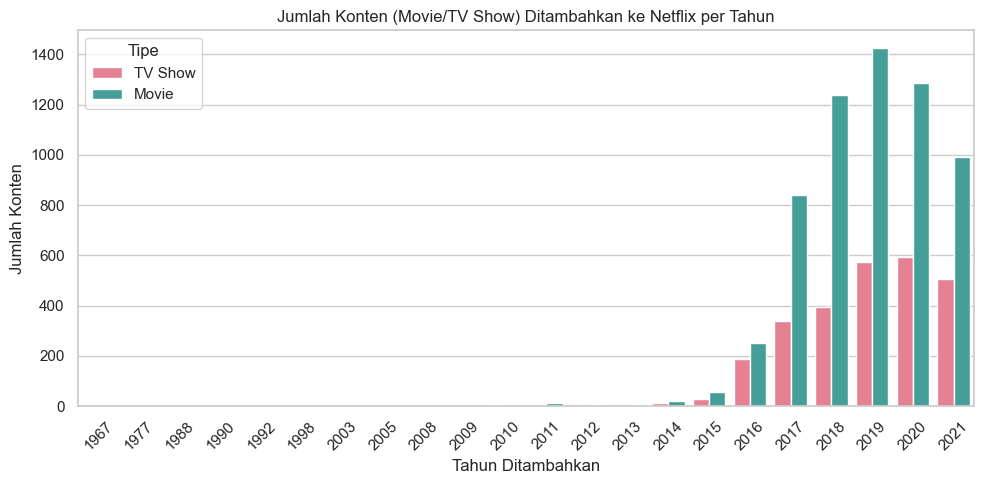

In [58]:
# Pastikan format datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Ekstrak tahun dari kolom date_added
df['year_added'] = df['date_added'].dt.year

# Plot jumlah movie & tv show ditambahkan per tahun
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', hue='type', palette='husl')
plt.title('Jumlah Konten (Movie/TV Show) Ditambahkan ke Netflix per Tahun')
plt.xlabel('Tahun Ditambahkan')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.legend(title='Tipe')
plt.tight_layout()
plt.show()


## **6. Insights & Conclusions**

Setelah dilakukan eksplorasi dan visualisasi terhadap dataset Netflix, berikut beberapa **temuan penting**:

**1. Movie vs TV Show**

* **Movies** mendominasi platform Netflix, dengan rasio hampir 2:1 dibandingkan TV Shows.
* Hal ini menunjukkan bahwa Netflix lebih banyak menambahkan film daripada serial, kemungkinan karena durasi produksi dan konsumsi yang lebih singkat.

**2. Content Added Over the Years**

* Terjadi peningkatan signifikan dalam jumlah konten yang ditambahkan ke Netflix sejak tahun **2015**.
* Tahun **2019 dan 2020** menjadi masa puncak penambahan konten, kemungkinan karena ekspansi global dan meningkatnya permintaan hiburan digital selama pandemi.

**3. Most Popular Genres**

* **Documentaries**, **Dramas**, dan **Comedies** adalah genre paling dominan.
* Ini mencerminkan preferensi penonton global terhadap cerita nyata, drama kehidupan, dan hiburan ringan.

**4. Content Origins**

* **United States** menjadi negara penyumbang konten terbanyak.
* Disusul oleh negara-negara seperti India, United Kingdom, dan Canada — menunjukkan bahwa Netflix berinvestasi besar dalam pasar berbahasa Inggris dan Asia Selatan.

**5. Trend Konten Berdasarkan Tipe**

* Baik Movie maupun TV Show mengalami peningkatan penambahan setiap tahun, namun Movies selalu berada di atas secara jumlah.
* Visualisasi dengan hue `type` menunjukkan bahwa proporsi Movies lebih stabil dibandingkan TV Shows.

